# Create maps for representing Bloch spheres

For that I'll use the Husimi distribution of totally polarized states poinitg onto some direction $\bf{n}$
$$Q(\phi,\theta) = \frac{1}{2\pi} \langle Nj |_{\bf{n}} \varrho | Nj \rangle_{\bf{n}}$$

## Load libraries

In [24]:
using HDF5, PyPlot
using BasicQuIn

# functions to generate the map
include("blochSphere.jl")

sys:1: PyGIWarning: Gtk was imported without specifying a version first. Use gi.require_version('Gtk', '3.0') before import to ensure that the right version gets loaded.


Function to generate map data

## Generate map

In [111]:
density = generateMap(eig(s_y(5))[2][:,end],s_z(5),s_y(5),50);

Create the map

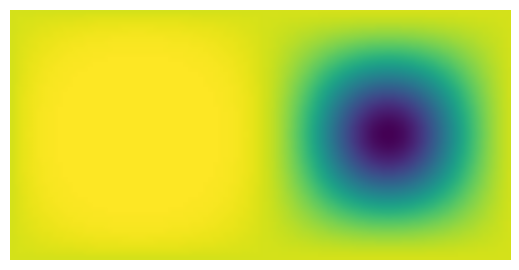

In [112]:
fig = figure()
fig[:set_size_inches](5, 5)
ax = axes([0,0,1.,1.], frameon=false)
ax[:set_axis_off]()

ax[:get_xaxis]()[:set_visible](false)
ax[:get_yaxis]()[:set_visible](false)

fig[:add_axes](ax)
ax[:imshow](density,cmap="viridis_r", interpolation="bilinear", origin="upper")
ax[:margins](0,0)
savefig("blochMap.png", bbox_inches="tight", transparent=true, pad_inches=0)

In [130]:
localPath = pwd()
run(`blender -b --verbose -1 $localPath/blochSphere.blend -o blochSphere_# -E CYCLES -F PNG -x 1  -f 1 > rendering.log`);

Color management: using fallback mode for management
Read new prefs: /home/iapellaniz/.config/blender/2.76/config/userpref.blend
read blend: /home/iapellaniz/Physics/PhD/Julia/Plots4Thesis/assats/blochMap.blend
Fra:1 Mem:21.42M (0.00M, Peak 63.77M) | Time:00:00.00 | Mem:0.00M, Peak:0.00M | Scene, RenderLayer | Synchronizing object | Axises
Fra:1 Mem:21.42M (0.00M, Peak 63.77M) | Time:00:00.00 | Mem:0.00M, Peak:0.00M | Scene, RenderLayer | Synchronizing object | Lamp
Fra:1 Mem:21.42M (0.00M, Peak 63.77M) | Time:00:00.00 | Mem:0.00M, Peak:0.00M | Scene, RenderLayer | Synchronizing object | wireframe
Fra:1 Mem:21.42M (0.00M, Peak 78.12M) | Time:00:03.11 | Mem:0.00M, Peak:0.00M | Scene, RenderLayer | Synchronizing object | Camera
Fra:1 Mem:21.42M (0.00M, Peak 78.12M) | Time:00:03.11 | Mem:0.00M, Peak:0.00M | Scene, RenderLayer | Synchronizing object | UVsphere
Fra:1 Mem:21.42M (0.00M, Peak 78.12M) | Time:00:03.11 | Mem:0.00M, Peak:0.00M | Scene, RenderLayer | Synchronizing object | ecuator

LoadError: LoadError: failed process: Process(`blender -b --verbose -1 /home/iapellaniz/Physics/PhD/Julia/Plots4Thesis/assats/blochMap.blend -o output_# -E CYCLES -F PNG -x 1 -f 1 > rendering.log`, ProcessExited(1)) [1]
while loading In[130], in expression starting on line 2

Your PNG image is ready! 360x360 PNG Bloch sphere


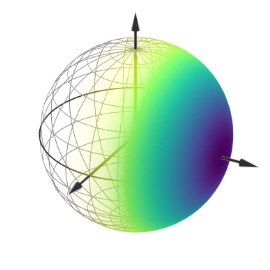

In [129]:
fig = figure()
fig[:set_size_inches](2.5, 2.5)
ax = axes([0,0,1.,1.], frameon=false)
ax[:set_axis_off]()

ax[:get_xaxis]()[:set_visible](false)
ax[:get_yaxis]()[:set_visible](false)

imshow(imread("output_1.png"),interpolation="bilinear")
println("Your PNG image is ready! 360x360 PNG Bloch sphere")